# Part 1 of the Machine Learning Project

## Preliminaries


Before satring familiarize yourself with pandas reading the “10 minutes to pandas” tutorial: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

Browse through the full pandas user guide when needed: https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html


## Load libraries

In [2]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd
# File system manangement
import os
# Suppress warnings
#import warnings
#warnings.filterwarnings('ignore')
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm, trange
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


<p><img alt="Datasets" src="https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png" align="left" hspace="10px" vspace="0px"></p>


<h1>Datasets</h1>

In [3]:
## Change this part with your own dataset files

src_train = 'https://docs.google.com/uc?export=download&id=1TNRRGlws5vWKEum8v1PQrVq8PGacMT9Y'
src_test = 'https://docs.google.com/uc?export=download&id=1IEUuu-Czdv2gsE8Q0EUtGvUelh2xUwN8'

src_previous ='https://docs.google.com/uc?export=download&id=15PuV3DpXii2FokryWCyxTS4HGUj4Kbmn'
src_bureau = 'https://docs.google.com/uc?export=download&id=18ycqN4m4zmoLvZHWIvYzF9SZiErAPeTi'

# If you cannot load the directly the csv from Google drive (Google restrictions), download them manually then change the path to load them locally
data_folder = 'data'

app_train = pd.read_csv(os.path.join(data_folder, 'application_train.csv.zip'), compression='zip')
app_train


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<h1>Loading the datasets (2 pts)</h1>

1. Similarly to the train set, load the test set, the bureau dataset and the past applications dataset.

2. Display for each the number of rows and the number of columns

*You will be evaluated as follow*
* 1: Correct approach + code: 1pt
* 2: Code: 1pts


In [4]:
#Your code here
#The variables that should be implemented to store the data are: app_train, app_test, bureau, app_past

# 1 - Loading the different datasets.
app_test = pd.read_csv(os.path.join(data_folder, 'application_test.csv.zip'), compression='zip')
bureau = pd.read_csv(os.path.join(data_folder, 'bureau.csv.zip'), compression='zip')
app_past = pd.read_csv(os.path.join(data_folder, 'previous_application.csv.zip'), compression='zip')

# 2 - The number of rows and columns for each
print('app_train shape:', app_train.shape)
print('app_test shape :', app_test.shape)
print('bureau shape   :', bureau.shape)
print('app_past shape :', app_past.shape)

app_train shape: (307511, 122)
app_test shape : (48744, 121)
bureau shape   : (1716428, 17)
app_past shape : (1670214, 37)


<h1> Feature Engineering</h1>

<h2>Missing values (9pts)</h2>


**3.a**: What columns are missing the most values in app_test?

**3.b**: What columns are missing the most values in bureau?

**3.c**: What columns are missing the most values in app_past?

4: Fix missing data in app_test dataset using categorization and/or simple imputation when appropriate. Be careful to the **data leakage** issue!

*You will be evaluated as follow*
* 3: Correct approach + code 2pts.
* 4: Description of the approach 4pts. Code implementation of the approach 3pts.

## 3.a

What columns are missing the most values in `app_test`?

In [5]:
app_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [6]:
# to be sure that the missing data is save as real missing data (not in the string format) let's check the columns dtype first.
# To explain more sometimes the missing data is storede like 'Unknown' for instance, wich makes a int column to be a string column.
app_train.dtypes.to_dict()

{'SK_ID_CURR': dtype('int64'),
 'TARGET': dtype('int64'),
 'NAME_CONTRACT_TYPE': dtype('O'),
 'CODE_GENDER': dtype('O'),
 'FLAG_OWN_CAR': dtype('O'),
 'FLAG_OWN_REALTY': dtype('O'),
 'CNT_CHILDREN': dtype('int64'),
 'AMT_INCOME_TOTAL': dtype('float64'),
 'AMT_CREDIT': dtype('float64'),
 'AMT_ANNUITY': dtype('float64'),
 'AMT_GOODS_PRICE': dtype('float64'),
 'NAME_TYPE_SUITE': dtype('O'),
 'NAME_INCOME_TYPE': dtype('O'),
 'NAME_EDUCATION_TYPE': dtype('O'),
 'NAME_FAMILY_STATUS': dtype('O'),
 'NAME_HOUSING_TYPE': dtype('O'),
 'REGION_POPULATION_RELATIVE': dtype('float64'),
 'DAYS_BIRTH': dtype('int64'),
 'DAYS_EMPLOYED': dtype('int64'),
 'DAYS_REGISTRATION': dtype('float64'),
 'DAYS_ID_PUBLISH': dtype('int64'),
 'OWN_CAR_AGE': dtype('float64'),
 'FLAG_MOBIL': dtype('int64'),
 'FLAG_EMP_PHONE': dtype('int64'),
 'FLAG_WORK_PHONE': dtype('int64'),
 'FLAG_CONT_MOBILE': dtype('int64'),
 'FLAG_PHONE': dtype('int64'),
 'FLAG_EMAIL': dtype('int64'),
 'OCCUPATION_TYPE': dtype('O'),
 'CNT_FAM_MEMB

After checking columns one by one we can see non of the columns has wrong dtypes.

In [7]:
def find_most_missing(df: pd.DataFrame, n: int = 10):
    missing_count = df.isnull().sum().to_frame(name="count").sort_values('count', ascending=False)
    missing_count['percentage'] = missing_count['count'] / len(df)
    return missing_count.iloc[:n]

find_most_missing(app_test, 10)

,count,percentage
COMMONAREA_AVG,33495,0.687161
COMMONAREA_MODE,33495,0.687161
COMMONAREA_MEDI,33495,0.687161
NONLIVINGAPARTMENTS_AVG,33347,0.684125
NONLIVINGAPARTMENTS_MODE,33347,0.684125
NONLIVINGAPARTMENTS_MEDI,33347,0.684125
FONDKAPREMONT_MODE,32797,0.672842
LIVINGAPARTMENTS_AVG,32780,0.672493
LIVINGAPARTMENTS_MODE,32780,0.672493
LIVINGAPARTMENTS_MEDI,32780,0.672493


## 3.b

What columns are missing the most values in `bureau`?

In [8]:
find_most_missing(bureau, 10)

,count,percentage
AMT_ANNUITY,1226791,0.714735
AMT_CREDIT_MAX_OVERDUE,1124488,0.655133
DAYS_ENDDATE_FACT,633653,0.369170
AMT_CREDIT_SUM_LIMIT,591780,0.344774
AMT_CREDIT_SUM_DEBT,257669,0.150119
DAYS_CREDIT_ENDDATE,105553,0.061496
AMT_CREDIT_SUM,13,0.000008
CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,0,0.000000
DAYS_CREDIT,0,0.000000


## 3.c

What columns are missing the most values in `app_past`?

In [9]:
find_most_missing(app_past, 10)

,count,percentage
RATE_INTEREST_PRIVILEGED,1664263,0.996437
RATE_INTEREST_PRIMARY,1664263,0.996437
AMT_DOWN_PAYMENT,895844,0.536365
RATE_DOWN_PAYMENT,895844,0.536365
NAME_TYPE_SUITE,820405,0.491198
NFLAG_INSURED_ON_APPROVAL,673065,0.402981
DAYS_TERMINATION,673065,0.402981
DAYS_LAST_DUE,673065,0.402981
DAYS_LAST_DUE_1ST_VERSION,673065,0.402981
DAYS_FIRST_DUE,673065,0.402981


In [10]:
# 3

## Your code here


# 4: Fix missing data in app_test using categorization and/or simple imputation when appropriate. You should use *only* pandas and nu mpy here. You should *not* use sklearn (scikit-learn).

## Your code here


# 4

Fix missing data in app_test dataset using categorization and/or simple imputation when appropriate. Be careful to the **data leakage** issue!

In [11]:
# lets remove the lines with missing data with more than 60% missing data
# then we can remove columns with more than 30% missing data

rows_removal_threshold = 0.6 * app_train.shape[1]
cols_removal_threshold = 0.3 * app_train.shape[0]

print(f'Before removing missing data {app_train.shape}')
orig_cols = app_train.columns
app_train = app_train.drop(index = app_train.index[app_train.isna().sum(axis=1) > rows_removal_threshold])
app_train = app_train.drop(columns = app_train.columns[(droped_cols:=pd.isna(app_train).sum() > cols_removal_threshold)])

print(f'After removing missing data {app_train.shape}')

droped_columns = orig_cols.difference(app_train.columns)
print(f'Columns to drop: {droped_columns}')
find_most_missing(app_train, 10)

Before removing missing data (307511, 122)
After removing missing data (307511, 72)
Columns to drop: Index(['APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE',
       'BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE',
       'COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE', 'ELEVATORS_AVG',
       'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'EMERGENCYSTATE_MODE',
       'ENTRANCES_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'EXT_SOURCE_1',
       'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'FLOORSMIN_AVG',
       'FLOORSMIN_MEDI', 'FLOORSMIN_MODE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'LANDAREA_AVG', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MEDI',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_MODE',
       'OCCUPAT

,count,percentage
EXT_SOURCE_3,60965,0.198253
AMT_REQ_CREDIT_BUREAU_YEAR,41519,0.135016
AMT_REQ_CREDIT_BUREAU_QRT,41519,0.135016
AMT_REQ_CREDIT_BUREAU_MON,41519,0.135016
AMT_REQ_CREDIT_BUREAU_WEEK,41519,0.135016
AMT_REQ_CREDIT_BUREAU_DAY,41519,0.135016
AMT_REQ_CREDIT_BUREAU_HOUR,41519,0.135016
NAME_TYPE_SUITE,1292,0.004201
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.003320
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.003320


In [12]:
# to find the categorical columns we can find the columns with dtype 'object' and among the numeric column check if the number of unique values is less than 10

categorical_columns = app_train.select_dtypes(include='object').columns

for col in app_train.select_dtypes(include='int').columns:
    if app_train[col].nunique() < 5:
        print(col, app_train[col].unique())
        categorical_columns = categorical_columns.append(pd.Index([col]))
    
categorical_columns

TARGET [1 0]
FLAG_MOBIL [1 0]
FLAG_EMP_PHONE [1 0]
FLAG_WORK_PHONE [0 1]
FLAG_CONT_MOBILE [1 0]
FLAG_PHONE [1 0]
FLAG_EMAIL [0 1]
REGION_RATING_CLIENT [2 1 3]
REGION_RATING_CLIENT_W_CITY [2 1 3]
REG_REGION_NOT_LIVE_REGION [0 1]
REG_REGION_NOT_WORK_REGION [0 1]
LIVE_REGION_NOT_WORK_REGION [0 1]
REG_CITY_NOT_LIVE_CITY [0 1]
REG_CITY_NOT_WORK_CITY [0 1]
LIVE_CITY_NOT_WORK_CITY [0 1]
FLAG_DOCUMENT_2 [0 1]
FLAG_DOCUMENT_3 [1 0]
FLAG_DOCUMENT_4 [0 1]
FLAG_DOCUMENT_5 [0 1]
FLAG_DOCUMENT_6 [0 1]
FLAG_DOCUMENT_7 [0 1]
FLAG_DOCUMENT_8 [0 1]
FLAG_DOCUMENT_9 [0 1]
FLAG_DOCUMENT_10 [0 1]
FLAG_DOCUMENT_11 [0 1]
FLAG_DOCUMENT_12 [0 1]
FLAG_DOCUMENT_13 [0 1]
FLAG_DOCUMENT_14 [0 1]
FLAG_DOCUMENT_15 [0 1]
FLAG_DOCUMENT_16 [0 1]
FLAG_DOCUMENT_17 [0 1]
FLAG_DOCUMENT_18 [0 1]
FLAG_DOCUMENT_19 [0 1]
FLAG_DOCUMENT_20 [0 1]
FLAG_DOCUMENT_21 [0 1]


Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'TARGET', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', '

As we can see, there is only one column that contains -1 value. also, that column has no missing value! So we can use -1 as a new class for missing values. and the word "missing" for the rest of the columns.

In [13]:
number_of_classes = {}
medians = {} # for the integer columns
means = {} # for the float columns
max_class_count = 10

for col in app_train.columns:
    if col == "TARGET":
        continue
    if app_train[col].dtype in ['int64', 'object']:
        classes = app_train[col].unique()
        if len(classes) < 5 or app_train[col].dtype == 'object':
            number_of_classes[col] = len(classes)
            if (n:=set(app_test[col].unique())) != (m:=set(classes)):
                print(f'Warning: The classes are different between train and test for column {col}\ntrain claeses: {m}\ntest classes: {n}\n')
        else: 
            # if the column is integer and has more than 5 classes we can use the median
            medians[col] = app_train[col].median()
    elif app_train[col].dtype == 'float':
        means[col] = app_train[col].mean()
    else:
        raise TypeError(f"Unknown type for column {col},the type is {app_train[col].dtype}")

print(f"{number_of_classes=}\n{means=}\n{medians=}")

train claeses: {'XNA', 'M', 'F'}
test classes: {'M', 'F'}

train claeses: {'Pensioner', 'Commercial associate', 'Student', 'Unemployed', 'State servant', 'Working', 'Businessman', 'Maternity leave'}
test classes: {'Pensioner', 'Commercial associate', 'Student', 'Unemployed', 'State servant', 'Working', 'Businessman'}

train claeses: {'Civil marriage', 'Widow', 'Single / not married', 'Separated', 'Unknown', 'Married'}
test classes: {'Civil marriage', 'Widow', 'Single / not married', 'Separated', 'Married'}

train claeses: {1, 2, 3}
test classes: {1, 2, 3, -1}

train claeses: {0, 1}
test classes: {0}

train claeses: {0, 1}
test classes: {0}

train claeses: {0, 1}
test classes: {0}

train claeses: {0, 1}
test classes: {0}

train claeses: {0, 1}
test classes: {0}

train claeses: {0, 1}
test classes: {0}

train claeses: {0, 1}
test classes: {0}

train claeses: {0, 1}
test classes: {0}

train claeses: {0, 1}
test classes: {0}

train claeses: {0, 1}
test classes: {0}

train claeses: {0, 1}
t

As we can see, there is too many columns has different distribution between test and train set. We should consider this later in the one-hot encoding step

In [14]:
assert len(number_of_classes) + len(means) + len(medians) == app_train.shape[1] - 1, "Some columns are not processed"
assert set(number_of_classes.keys()) & set(means.keys()) == set(), "Some columns are processed as both integer and float"
assert set(number_of_classes.keys()) & set(medians.keys()) == set(), "Some columns are processed as both integer and float"
assert set(medians.keys()) & set(means.keys()) == set(), "Some columns are processed as both integer and float"
print("All columns are processed correctly")

All columns are processed correctly


In [15]:
app_test_cleaned = app_test.copy().drop(columns=droped_columns).fillna(
    means | medians | {col: "Unknown" for col in number_of_classes}
)
app_test_cleaned[list(number_of_classes.keys())] = app_test_cleaned[
    list(number_of_classes.keys())
].astype("category")

app_train_cleaned = app_train.copy()
app_train_cleaned.fillna(
    means | medians | {col: "Unknown" for col in number_of_classes}, inplace=True
)
app_train_cleaned[list(number_of_classes.keys())] = app_train_cleaned[
    list(number_of_classes.keys())
].astype("category")

find_most_missing(app_test_cleaned, 10)

,count,percentage
SK_ID_CURR,0,0.0
FLAG_DOCUMENT_2,0,0.0
FLAG_DOCUMENT_8,0,0.0
FLAG_DOCUMENT_7,0,0.0
FLAG_DOCUMENT_6,0,0.0
FLAG_DOCUMENT_5,0,0.0
FLAG_DOCUMENT_4,0,0.0
FLAG_DOCUMENT_3,0,0.0
DAYS_LAST_PHONE_CHANGE,0,0.0
FLAG_DOCUMENT_10,0,0.0


**4**: Describe your approach, including how you choose the technique to apply, and how you apply the technique (double click to edit a text cell)


Answer:

First I troied to delete the rows wich has more than 60% missing values. But I realized that there is no such row. 
Then I delete the columns which has more than 30% missing values. And 50 columns are deleted. 
Then I checked the columns which has missing values.

To fill the missing values, the columns are handled as follows:
- For **categorical columns**, we'll introduce a new class for missing values.
- For **integer columns**, we'll use the median.
- For **float columns**, we'll apply the mean.

### Identifying categorical columns:
I consider columns with `dtype=object` (string) as categorical, as well as integer columns with fewer than 5 unique values.

### Handling data leakage:
To avoid data leakage, I have calcualted the median and mean values on the training set only (as well as the droped cols). Then, I applied these values to the test set.


> **Potential improvements**:  
> There are four columns — `"OBS_30_CNT_SOCIAL_CIRCLE"`, `"DEF_30_CNT_SOCIAL_CIRCLE"`, `"OBS_60_CNT_SOCIAL_CIRCLE"`, and `"DEF_60_CNT_SOCIAL_CIRCLE"` — which are numerical and seem potentially important (though this is just a guess). I'll convert them to categorical columns and use a new class for missing values. To decide on this conversion, we can look at their histograms, which show most of the integers range from 1 to 5.  


# 6 Class Imbalance (8 pts)

5. Evaluate the class imbalance of the training set.

6. **a** Fix the class imbalance with over/undersampling

 **b** Use the SMOTE algorithm to fix class imbalance

*You will be evaluated as follow*
* 5: Correct approach + code: 2ts
* 6.a: code 3pt
* 6.b: code 3pts

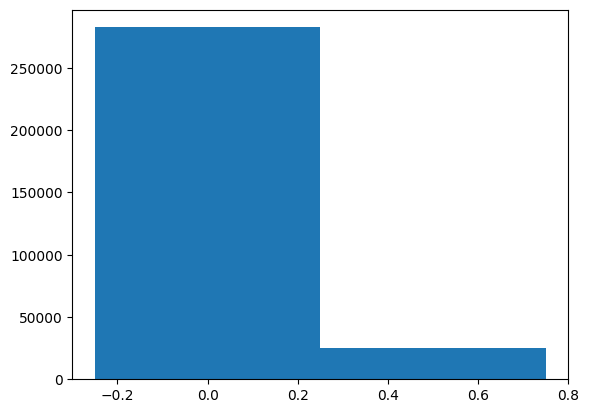

In [16]:
# 5 - value counts
hist, bins = np.histogram(app_train_cleaned['TARGET'], bins=2)

# 5 - histograms
plt.bar(bins[:-1], hist, width=0.5)
plt.show()

**5**: Describe briefly your observation (double click to edit a text cell)

In [17]:
# copy your current dataframe with its .copy() method. You should always use the copy() method if you want to keep the original dataframe untouched when you modify
# this is a very common bug, so please read  https://www.statology.org/pandas-copy-dataframe/




## 6.a - fix imbalance with undersampling or oversampling
Implement undersampling or oversampling *without* external libraries, only the library provided to implement yourself the chosen solution.

One of the easiest ways to create more synthetic data is to use the existing data and add noise $\mathcal{N}(0, 1)$ to it. Note that we need to add noise to the columns that are not the categorical columns.

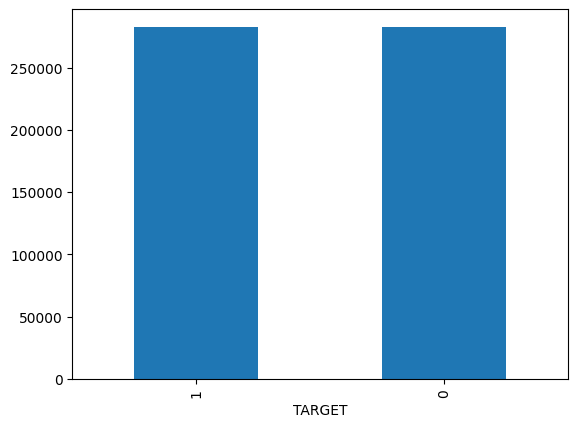

In [18]:

new_data = []
traget_count = app_train_cleaned['TARGET'].value_counts()
new_data = app_train_cleaned[app_train_cleaned['TARGET'] == 1].sample(n = traget_count[0] - traget_count[1], replace=True)
new_data['TARGET'] = 1

new_data[k] = new_data[k:=list(means.keys())] + np.random.normal(0, 1, new_data[k].shape)
app_train_naive_balanced = pd.concat([app_train_cleaned, new_data])
app_train_naive_balanced['TARGET'].value_counts().plot(kind='bar')
plt.show()


# 6.b - fix balance with SMOTE on your previously copied dataframe
You can use any external libraries to use SMOTE. We recommend the imbalanced-learn package https://imbalanced-learn.org/stable/over_sampling.html
Make sure to select the appropriate SMOTE variant.



using the saved file


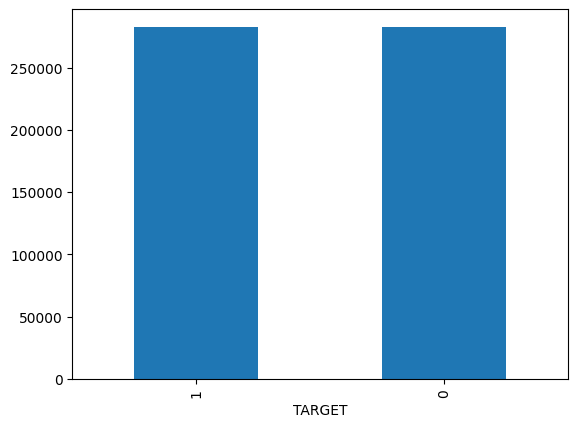

In [19]:
if "app_train_smote.csv" not in os.listdir():
    smote = SMOTENC(categorical_features='auto', random_state=42)
    app_train_smote, y_res = smote.fit_resample(app_train_cleaned.drop(columns='TARGET'), app_train_cleaned['TARGET'])
    app_train_smote['TARGET'] = y_res
    app_train_smote.to_csv("app_train_smote.csv", index=False)
else:
    app_train_smote = pd.read_csv("app_train_smote.csv")
    print("using the saved file")

app_train_smote['TARGET'].value_counts().plot(kind='bar')
plt.show()

In [38]:
app_train_smote.shape

(565372, 72)

# 7 Categorical features (9pts)

In `app_test`

## 7a 
How will you transform the column NAME_HOUSING_TYPE in app_test be correctly handled by the model? How will you transform CODE_GENDER column?


In [20]:
app_train_smote['NAME_HOUSING_TYPE'].value_counts(), app_train_smote['CODE_GENDER'].value_counts()

(NAME_HOUSING_TYPE
 House / apartment      526936
 With parents            17663
 Municipal apartment     11782
 Rented apartment         5219
 Office apartment         2643
 Co-op apartment          1129
 Name: count, dtype: int64,
 CODE_GENDER
 F      360637
 M      204731
 XNA         4
 Name: count, dtype: int64)

In [21]:
app_test_cleaned['NAME_HOUSING_TYPE'].value_counts(), app_test_cleaned['CODE_GENDER'].value_counts()

(NAME_HOUSING_TYPE
 House / apartment      43645
 With parents            2234
 Municipal apartment     1617
 Rented apartment         718
 Office apartment         407
 Co-op apartment          123
 Name: count, dtype: int64,
 CODE_GENDER
 F    32678
 M    16066
 Name: count, dtype: int64)

For categorical columns, we can use one-hot encoding. For instance instead of having a column `CODE_GENDER`, we can have these columns:
- CODE_GENDER_F
- CODE_GENDER_M
- CODE_GENDER_XNA
  
***Which are going to be binary columns?***
We can remove the lines with 'XNA' in the `CODE_GENDER` column, as it is only 4 lines. Then we can have a binary column for `CODE_GENDER`.

> One may ask the model may loose the information if we remove them. Also, we should note that with only 4 line among $~50k$ lines, the model will not be able to learn anything from this class.


## 7b
How would you transform the column `NAME_HOUSING_TYPE` in app_test if you want only 3 categories? Use `LabelEncoder` to transform `FLAG_OWN_CAR` column.


In [22]:
t = app_train_cleaned['NAME_HOUSING_TYPE'].value_counts().to_frame(name='NAME_HOUSING_TYPE')
t['percentage'] = t['NAME_HOUSING_TYPE'] / app_train_cleaned.shape[0]
t.sort_values('percentage', ascending=False)

,NAME_HOUSING_TYPE,percentage
NAME_HOUSING_TYPE,,
House / apartment,272868,0.887344
With parents,14840,0.048258
Municipal apartment,11183,0.036366
Rented apartment,4881,0.015873
Office apartment,2617,0.008510
Co-op apartment,1122,0.003649


We can remove the least frequent category and use the class "others" for `["Municipal apartment","Rented apartment","Office apartment","Co-op apartment"]`.


In [23]:
app_train_cleaned['FLAG_OWN_CAR'].value_counts()

FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

In [24]:
# Use LabelEncoder to transform the `FLAG_OWN_CAR` 
t = app_train_cleaned[['FLAG_OWN_CAR']]
LabelEncoder().fit_transform(t)

/home/kasra/py_venvs/py311_ml/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 1, ..., 0, 0, 0])

Since `FLAG_OWN_CAR` contains only two categories, The output of the `LabelEncoder` will be binary. We can use this output directly in the model.

## 7c
In `ORGANIZATION_TYPE`, only keep the categories that appear in more than 10% of the dataset. Group other categories in one. What is the size of the dummy vector for `ORGANIZATION_TYPE` after this transformation?

In [25]:
t = app_train_cleaned['ORGANIZATION_TYPE'].value_counts().to_frame(name='count').reset_index()
t['percentage'] = t['count'] / app_train_cleaned.shape[0] * 100
t.sort_values('percentage', ascending=False)

,ORGANIZATION_TYPE,count,percentage
0,Business Entity Type 3,67992,22.110429
1,XNA,55374,18.007161
2,Self-employed,38412,12.491260
3,Other,16683,5.425172
4,Medicine,11193,3.639870
5,Business Entity Type 2,10553,3.431747
6,Government,10404,3.383294
7,School,8893,2.891929
8,Trade: type 7,7831,2.546576
9,Kindergarten,6880,2.237318


In [26]:

t.loc[t['percentage'] < 10, 'ORGANIZATION_TYPE'] = 'Other'
t.groupby('ORGANIZATION_TYPE', observed=True).sum().sort_values('count', ascending=False)

,count,percentage
ORGANIZATION_TYPE,,
Other,145733,47.391150
Business Entity Type 3,67992,22.110429
XNA,55374,18.007161
Self-employed,38412,12.491260


** What is the size of the dummy vector for `ORGANIZATION_TYPE` after this transformation?**

As we can see we end up with 4 categories. So the size of the dummy vector will be 4.

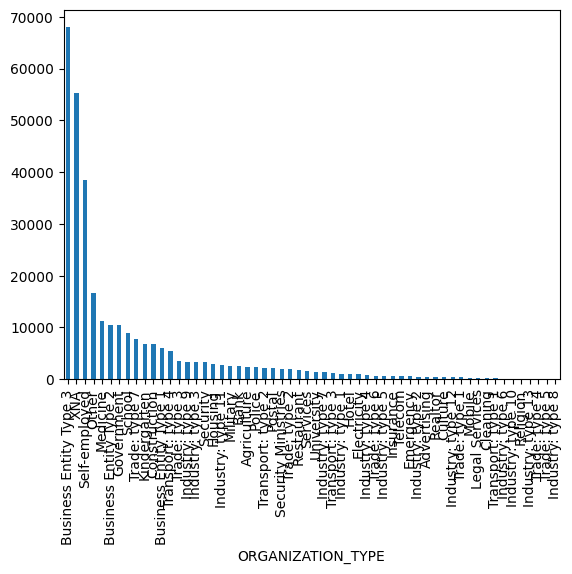

In [27]:
app_train_cleaned.loc[
    app_train_cleaned["ORGANIZATION_TYPE"].isin(
        (removed_cats_in_org_type := t[t["percentage"] < 10].index)
    ),
    "ORGANIZATION_TYPE",
] = "Other"
t = app_train_cleaned["ORGANIZATION_TYPE"].value_counts()
t[t > 0].plot(kind="bar")
plt.show()



## 8 In `app_test`, `app_past` and `bureau` transform all the categorical columns that you have not processed in 7 using One-hot encoding.


To encode the dataset we have two kinds of columns:
- **Categorical columns**
  - **Categorical columns without ordering**: We will use one-hot encoding (max 5 classes)
  - **Categorical columns with ordering**: We will use label encoding (only NAME_EDUCATION_TYPE and WEEKDAY_APPR_PROCESS_START are like this)
  - **Binary columns**: We will use label encoding (0, 1)
- **Numerical columns**: Leave them as they are

In [28]:
max_class_count = 5
app_train_summarized = app_train_cleaned.copy()
app_test_summarized = app_test_cleaned.copy()
assert app_train_summarized.isna().sum().sum() == 0, "There are missing data in the train dataset"
assert app_test_summarized.isna().sum().sum() == 0, "There are missing data in the test dataset"

ordered_cats = ["NAME_EDUCATION_TYPE", "WEEKDAY_APPR_PROCESS_START"]
mapper = {}
vectorized_cols = app_train_summarized.select_dtypes(include="category").columns
new_cat = "Other"

for col in ordered_cats:
    mapper[col] = {
        cat: i for i, cat in enumerate(app_train_cleaned[col].cat.categories)
    }
    app_train_summarized[col] = app_train_cleaned[col].map(mapper[col])
    app_test_summarized[col] = app_test_cleaned[col].map(mapper[col])
    if col in vectorized_cols:
        print(f"The column {col} is in the vectorized columns")
        vectorized_cols = vectorized_cols.drop(col)

encoder = OneHotEncoder(
    drop="first",
    max_categories=max_class_count,
    min_frequency=0.1,
    handle_unknown="infrequent_if_exist",
    sparse_output=False,
).fit(app_train_summarized[vectorized_cols])
app_train_encoded_arr = encoder.transform(app_train_summarized[vectorized_cols])
app_train_encoded = pd.concat(
    [
        (t:=pd.DataFrame(app_train_encoded_arr, columns=encoder.get_feature_names_out())),
        # app_train_summarized.select_dtypes("number"),
        app_train_summarized[ordered_cats],
    ],
    axis=1,
)
app_test_encoded_err = encoder.transform(app_test_summarized[vectorized_cols])
app_test_encoded = pd.concat(
    [
        pd.DataFrame(app_test_encoded_err, columns=encoder.get_feature_names_out()),
        # app_test_summarized.select_dtypes("number"),
        app_test_summarized[ordered_cats],
    ],
    axis=1,
)
app_train_encoded

The column NAME_EDUCATION_TYPE is in the vectorized columns
The column WEEKDAY_APPR_PROCESS_START is in the vectorized columns


/home/kasra/py_venvs/py311_ml/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,NAME_CONTRACT_TYPE_infrequent_sklearn,CODE_GENDER_M,CODE_GENDER_infrequent_sklearn,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_infrequent_sklearn,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_infrequent_sklearn,...,FLAG_DOCUMENT_14_infrequent_sklearn,FLAG_DOCUMENT_15_infrequent_sklearn,FLAG_DOCUMENT_16_infrequent_sklearn,FLAG_DOCUMENT_17_infrequent_sklearn,FLAG_DOCUMENT_18_infrequent_sklearn,FLAG_DOCUMENT_19_infrequent_sklearn,FLAG_DOCUMENT_20_infrequent_sklearn,FLAG_DOCUMENT_21_infrequent_sklearn,NAME_EDUCATION_TYPE,WEEKDAY_APPR_PROCESS_START
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,6
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,6
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
307507,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1
307508,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4
307509,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,6


In [29]:
app_train_encoded.to_csv("app_train_encoded.csv", index=False)


*You will be evaluated as follow*
* 7: Description of the approach 4pts. Code 3pts.
* 8: Correct approach + code 2pts.

<h2>Anomalies (7 pts)</h2>

**In app_test**



## 9a
Is there an anomaly with the column DEF_30_CNT_SOCIAL_CIRCLE? If so, how would you solve it?


DEF_30_CNT_SOCIAL_CIRCLE
0.000000     271324
1.000000      28328
2.000000       5323
3.000000       1192
0.143421       1021
4.000000        253
5.000000         56
6.000000         11
7.000000          1
34.000000         1
8.000000          1
Name: count, dtype: int64

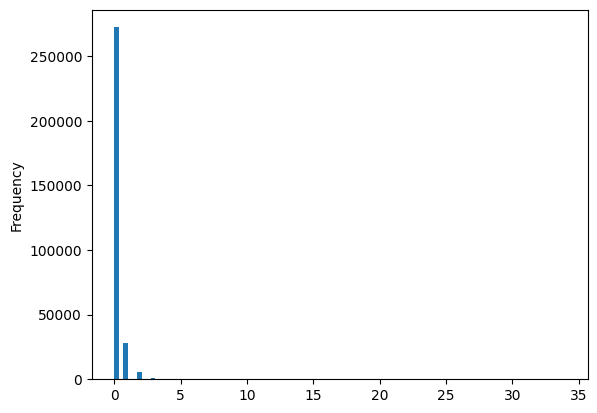

In [30]:
app_train_summarized['DEF_30_CNT_SOCIAL_CIRCLE'].plot(kind='hist', bins=100)
app_train_summarized['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()

We can remove 6,7,34,8 and replace it with the mean value (0.1434206662533851).

DEF_30_CNT_SOCIAL_CIRCLE
0.000000    271324
1.000000     28328
2.000000      5323
3.000000      1192
0.143421      1035
4.000000       253
5.000000        56
Name: count, dtype: int64

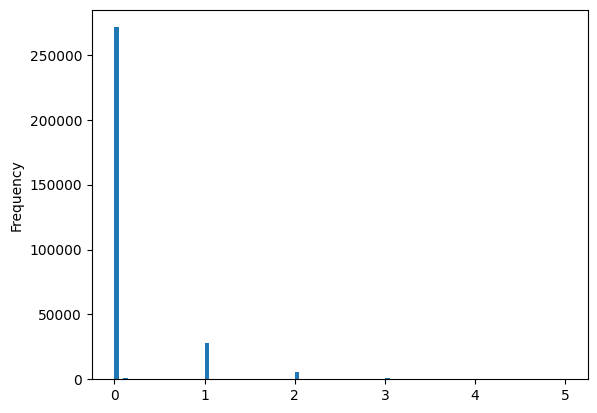

In [31]:
app_train_summarized.loc[app_train_summarized['DEF_30_CNT_SOCIAL_CIRCLE'].isin([6, 7, 34, 8]), 'DEF_30_CNT_SOCIAL_CIRCLE'] = 0.1434206662533851
app_train_summarized['DEF_30_CNT_SOCIAL_CIRCLE'].plot(kind='hist', bins=100)
app_train_summarized['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()

## 9b 
Is there an anomaly with the column LANDAREA_AVG? If so, how would you solve it?

In [32]:
print('LANDAREA_AVG' in droped_cols)

True


This column has been droped in the previous step. So we don't need to handle it :)

## 9c
Is there an anomaly with the column AMT_INCOME_TOTAL? If so, how would you solve it?

AMT_INCOME_TOTAL
25650.0         2
26100.0         3
26460.0         1
26550.0         2
27000.0        66
               ..
6750000.0       1
9000000.0       1
13500000.0      1
18000090.0      1
117000000.0     1
Name: count, Length: 2548, dtype: int64

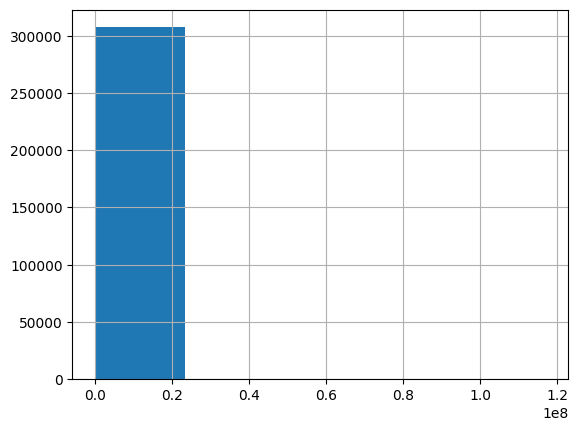

In [33]:
app_train_summarized['AMT_INCOME_TOTAL'].hist(bins=5)
app_train_summarized['AMT_INCOME_TOTAL'].value_counts().sort_index()

We can see there are some big values with very few frequency. We can use IQR to remove the outliers.

q1: 112500.0
q3: 202500.0
lower_bound: -22500.0
upper_bound: 337500.0
number of data points before removing outliers: 307511


number of data points after removing outliers: 235973


AMT_INCOME_TOTAL
25650.0         2
26100.0         3
26460.0         1
26550.0         2
27000.0        66
            ...  
201658.5        1
201811.5        1
202050.0        4
202275.0        1
202500.0    16341
Name: count, Length: 1755, dtype: int64

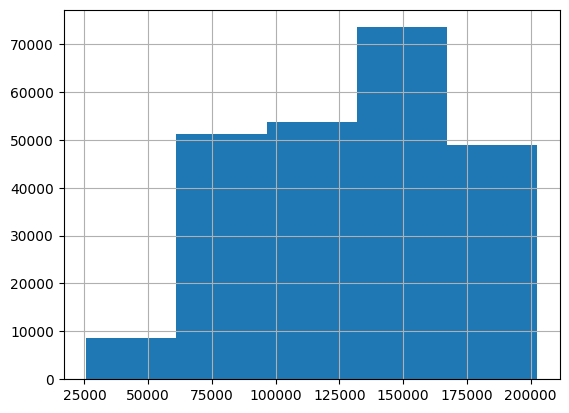

In [34]:
q3 = app_train_summarized['AMT_INCOME_TOTAL'].quantile(0.75)
q1 = app_train_summarized['AMT_INCOME_TOTAL'].quantile(0.25)

iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print('q1:', q1)
print('q3:', q3)
print('lower_bound:', lower_bound)
print('upper_bound:', upper_bound)
print(f"number of data points before removing outliers: {app_train_summarized.shape[0]}")
app_train_summarized = app_train_summarized.loc[app_train_summarized['AMT_INCOME_TOTAL'] <= q3]
print(f"number of data points after removing outliers: {app_train_summarized.shape[0]}")
app_train_summarized['AMT_INCOME_TOTAL'].hist(bins=5)
app_train_summarized['AMT_INCOME_TOTAL'].value_counts().sort_index()



# 10: Fix the anomaly in DAYS_EMPLOYED?


DAYS_EMPLOYED
-17912         1
-17583         1
-17531         1
-17522         1
-17170         1
           ...  
-3             2
-2             1
-1             1
 0             2
 365243    48026
Name: count, Length: 11949, dtype: int64

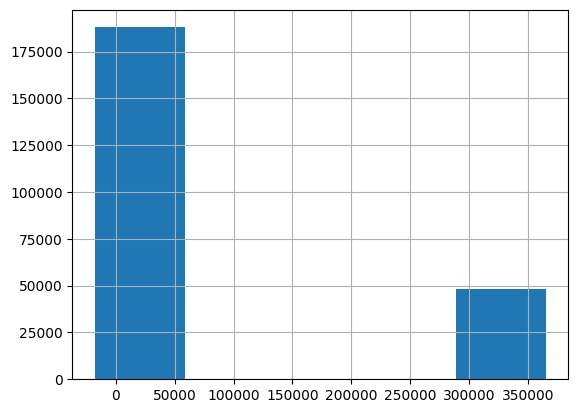

In [35]:
app_train_summarized['DAYS_EMPLOYED'].hist(bins=5)
app_train_summarized['DAYS_EMPLOYED'].value_counts().sort_index()


*You will be evaluated as follow*
* 9: Description of the approach + code 5pts.
* 10: code 2pts

In [36]:
## Your code here

<h2>Correlations (9 pts)</h2>


# 11
In app_test, remove the collinear features of the dataset. How did you choose the threshold?


In [37]:
corr_mat = app_train_summarized.corr().abs()
# upper_triangle = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(bool))
plt.hist(corr_mat.values.flatten(), bins=100)
plt.show()

ValueError: could not convert string to float: 'Business Entity Type 3'

In [ ]:
app_train_summarized.shape

(235973, 140)

In [ ]:
app_train_summarized.columns.difference(app_test_summarized.columns)

Index(['TARGET'], dtype='object')

In [ ]:
sum(corr_mat.values.flatten() > 0.6)/2

152.0

In [ ]:
upper = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]
print(f"Columns to drop: {to_drop}")
app_train_squeezed = app_train_summarized.drop(columns=to_drop)
app_test_squeezed = app_test_summarized.drop(columns=to_drop)
print(f"Shape after dropping: {app_train_squeezed.shape}")


Columns to drop: ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'NAME_CONTRACT_TYPE_Revolving loans', 'CODE_GENDER_M', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_Y', 'NAME_TYPE_SUITE_Unaccompanied', 'NAME_INCOME_TYPE_Pensioner', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'NAME_HOUSING_TYPE_With parents', 'FLAG_MOBIL_1', 'FLAG_EMP_PHONE_0', 'FLAG_EMP_PHONE_1', 'FLAG_WORK_PHONE_1', 'FLAG_CONT_MOBILE_1', 'FLAG_PHONE_1', 'FLAG_EMAIL_1', 'REGION_RATING_CLIENT_3', 'REGION_RATING_CLIENT_W_CITY_1', 'REGION_RATING_CLIENT_W_CITY_2', 'REGION_RATING_CLIENT_W_CITY_3', 'REG_REGION_NOT_LIVE_REGION_1', 'REG_REGION_NOT_WORK_REGION_1', 'LIVE_REGION_NOT_WORK_REGION_0', 'LIVE_REGION_NOT_WORK_REGION_1', 'REG_CITY_NOT_LIVE_CITY_1', 'REG_CITY_NOT_WORK_CITY_1', 'LIVE_CITY_NOT_WORK_CITY_0', 'LIVE_CITY_NOT_WORK_CITY_1', 'ORGANIZATION_TYPE_XNA', 'FLAG_DOCUMENT_2_1', 'FLAG_DOCUMENT_3_1', 'FLAG_DOCUMENT_4_1', 'FLAG_DOCUMENT_5_1', 'FL


12: What features from bureau.csv could you use to improve the training set? Use the random forest model from the notebook of the Lecture to check if it actually improves the final model performance.

*You will be evaluated as follow*
* 11: Code 3pts. Threshold explanation 1pt.
* 12: Description of the approach 1pt. Code implementation of the approach 2pts. Improved performance 2pts.

In [ ]:
## Your code here

##  Class imbalance and model performances (6 points)


**13**: Evaluate the other technique (SMOTE) to handeling imbalance data left in *6.b*. Does it makes a difference on the final model performance? Can you use the performance on the test set to choose which techniques to use? If not, what would you need to do so?

*You will be evaluated as follow*
* 13: Code 3pts. Explanation 3pts.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

**13**: Answer the question here (double click to edit a text cell)

